<a href="https://colab.research.google.com/github/slucasmyer/rl-trading/blob/main/data_exploration_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install mplfinance

# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import mplfinance as mpf
import matplotlib.pyplot as plt

# Initial set up
%matplotlib inline
sns.set_palette("mako")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.7 MB/s eta 0:00:00


In [29]:
# Gather data
raw_df = pd.read_csv("https://raw.githubusercontent.com/slucasmyer/rl-trading/main/training_tqqq.csv?token=GHSAT0AAAAAACNACNU4O2QDZQI2PBXADUSCZOKSNZA")
norm_df = pd.read_csv("https://raw.githubusercontent.com/slucasmyer/rl-trading/main/training_tqqq_prepared.csv?token=GHSAT0AAAAAACNACNU5WXXUWBGKQ73M52TYZOKSOYA")

In [30]:
norm_df.dtypes

timestamp                 object
open                     float64
high                     float64
low                      float64
close                    float64
volume                   float64
velocity_16w_0ts         float64
velocity_16w_2ts         float64
velocity_16w_4ts         float64
velocity_16w_6ts         float64
velocity_16w_8ts         float64
velocity_16w_10ts        float64
acceleration_16w_0ts     float64
acceleration_16w_2ts     float64
acceleration_16w_4ts     float64
acceleration_16w_6ts     float64
acceleration_16w_8ts     float64
acceleration_16w_10ts    float64
atr_16w_0ts              float64
atr_16w_2ts              float64
atr_16w_4ts              float64
atr_16w_6ts              float64
atr_16w_8ts              float64
atr_16w_10ts             float64
velocity_32w_0ts         float64
velocity_32w_2ts         float64
velocity_32w_4ts         float64
velocity_32w_6ts         float64
velocity_32w_8ts         float64
velocity_32w_10ts        float64
accelerati

In [31]:
type(raw_df['timestamp'][0])

str

In [32]:
raw_df.set_index('timestamp', inplace=True)

In [33]:
# Make the date index compatible with mplfinance
raw_df.index = pd.to_datetime(raw_df.index)

In [34]:
# Access the first 5 columns and the 7th column
raw_df.iloc[:, list(range(5))]

,open,high,low,close,volume
timestamp,,,,,
2011-01-03,151.81,157.610,151.790,154.56,5563200
2011-01-04,156.50,156.540,151.370,154.32,5480000
2011-01-05,152.79,158.220,152.590,158.15,5120000
2011-01-06,158.71,159.950,157.730,159.58,4355200
2011-01-07,160.39,160.660,154.590,159.21,6350400
...,...,...,...,...,...
2021-12-27,167.09,173.530,167.000,173.39,31490818
2021-12-28,174.76,174.980,170.030,171.35,36206255
2021-12-29,171.31,172.990,167.951,171.08,28873669


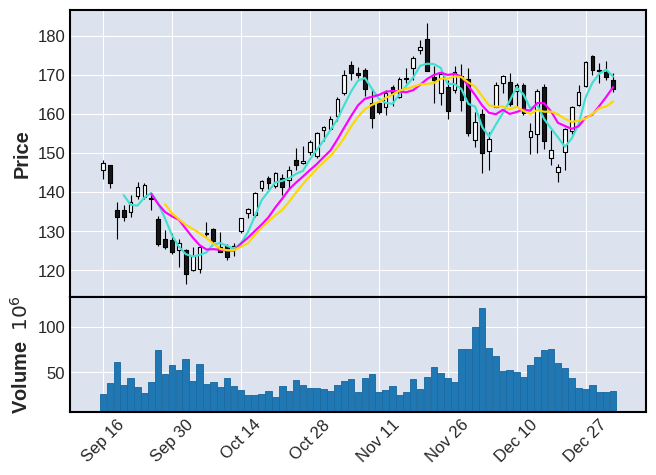

In [35]:
# Display plot -- last 75 days
# mav = moving average (4 days, 8 days, 10 days)
mpf.plot(raw_df.iloc[:, list(range(5))][-75:], type='candle', mav=(4, 8, 10), volume=True)

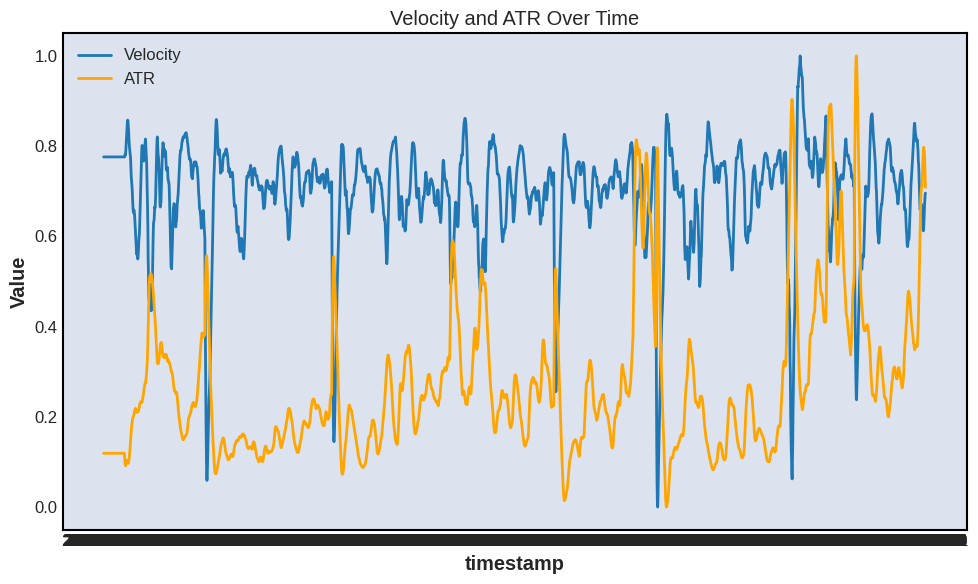

In [38]:
# Full data set
plt.figure(figsize=(10, 6))
sns.lineplot(data=norm_df, x='timestamp', y='velocity_64w_0ts', label="Velocity")
sns.lineplot(data=norm_df, x='timestamp', y='atr_64w_0ts', color="orange", label="ATR")
plt.title('Velocity and ATR Over Time')
plt.ylabel('Value')
plt.grid(False)
plt.tight_layout()
plt.show()

<ipython-input-37-abb93098d472>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=norm_df[-500:], x='timestamp', y='velocity_64w_0ts', label='Velocity', palette="mako")


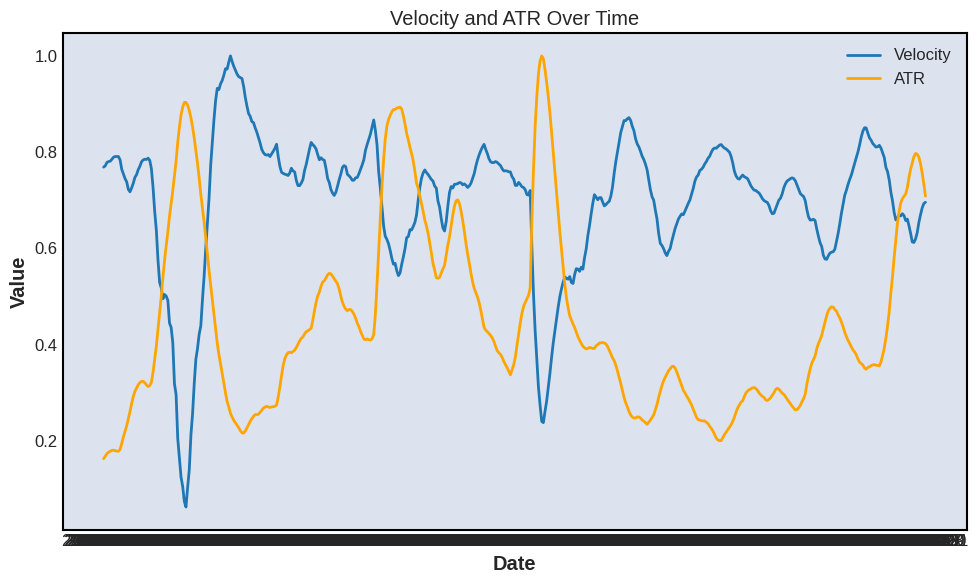

In [37]:
# Last 500 days
plt.figure(figsize=(10, 6))
sns.lineplot(data=norm_df[-500:], x='timestamp', y='velocity_64w_0ts', label='Velocity', palette="mako")
sns.lineplot(data=norm_df[-500:], x='timestamp', y='atr_64w_0ts', color="orange", label='ATR')
plt.title('Velocity and ATR Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

## High, Low, Close, and Volume

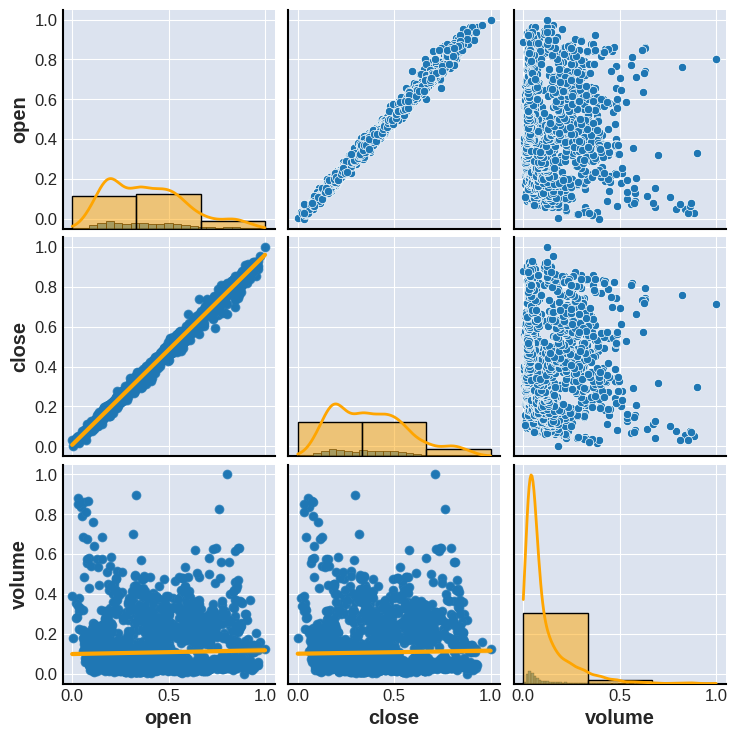

In [39]:
selected_columns = ['open', 'close', 'volume']
pairplot = sns.pairplot(norm_df[selected_columns], diag_kind='hist', height=2.5)

pairplot.map_lower(sns.regplot, line_kws={'color': 'orange'})
# pairplot.map_upper(sns.scatterplot)
for i, ax in enumerate(pairplot.diag_axes):
    sns.histplot(norm_df[selected_columns[i]], kde=True, color='orange', ax=ax, bins=3)

plt.show()

## Velocity, Acceleration, and ATR for 16 day window

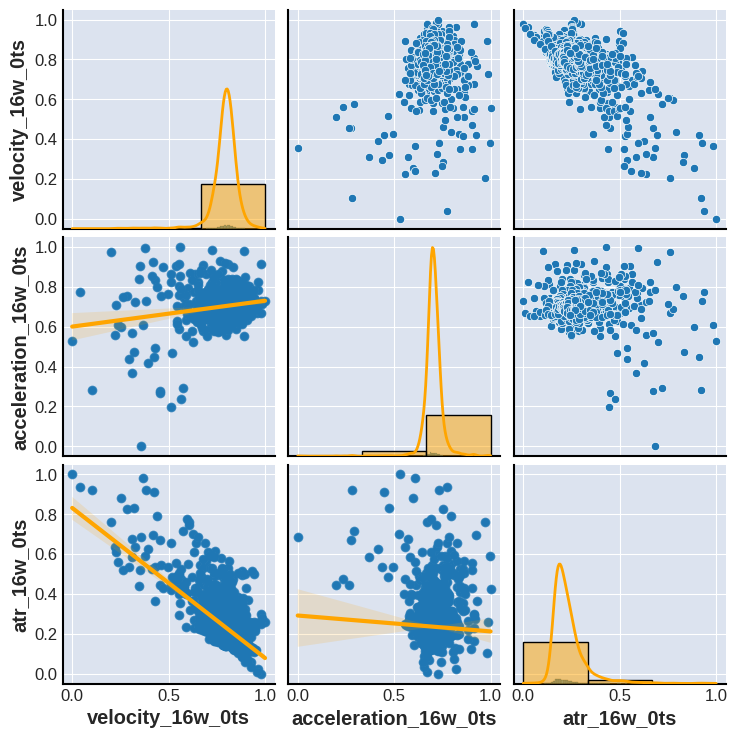

In [40]:
selected_columns = ['velocity_16w_0ts', 'acceleration_16w_0ts', 'atr_16w_0ts']
pairplot = sns.pairplot(norm_df[selected_columns], diag_kind='hist', height=2.5)

pairplot.map_lower(sns.regplot, line_kws={'color': 'orange'})
# pairplot.map_upper(sns.scatterplot)
for i, ax in enumerate(pairplot.diag_axes):
    sns.histplot(norm_df[selected_columns[i]], kde=True, color='orange', ax=ax, bins=3)

plt.show()

## Velocity, Acceleration, and ATR 32 day window

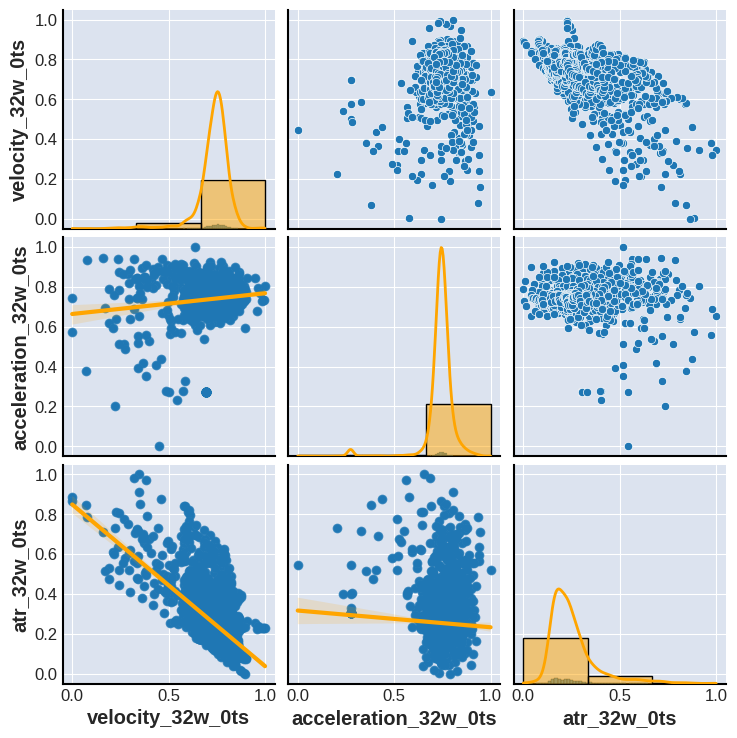

In [41]:
selected_columns = ['velocity_32w_0ts', 'acceleration_32w_0ts', 'atr_32w_0ts']
pairplot = sns.pairplot(norm_df[selected_columns], diag_kind='hist', height=2.5)

pairplot.map_lower(sns.regplot, line_kws={'color': 'orange'})
# pairplot.map_upper(sns.scatterplot)
for i, ax in enumerate(pairplot.diag_axes):
    sns.histplot(norm_df[selected_columns[i]], kde=True, color='orange', ax=ax, bins=3)

plt.show()

## Velocity, Acceleration, and ATR 64 day window

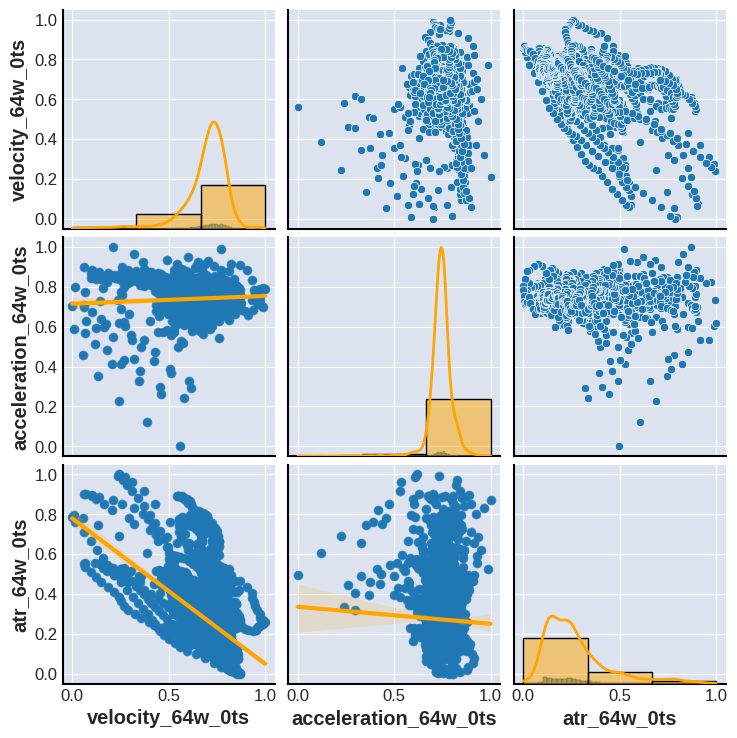

In [42]:
selected_columns = ['velocity_64w_0ts', 'acceleration_64w_0ts', 'atr_64w_0ts']
pairplot = sns.pairplot(norm_df[selected_columns], diag_kind='hist', height=2.5)

pairplot.map_lower(sns.regplot, line_kws={'color': 'orange'})
# pairplot.map_upper(sns.scatterplot)
for i, ax in enumerate(pairplot.diag_axes):
    sns.histplot(norm_df[selected_columns[i]], kde=True, color='orange', ax=ax, bins=3)

plt.show()

## 16 day Window with multiple time shifts (2, 6, 10)

<Axes: >

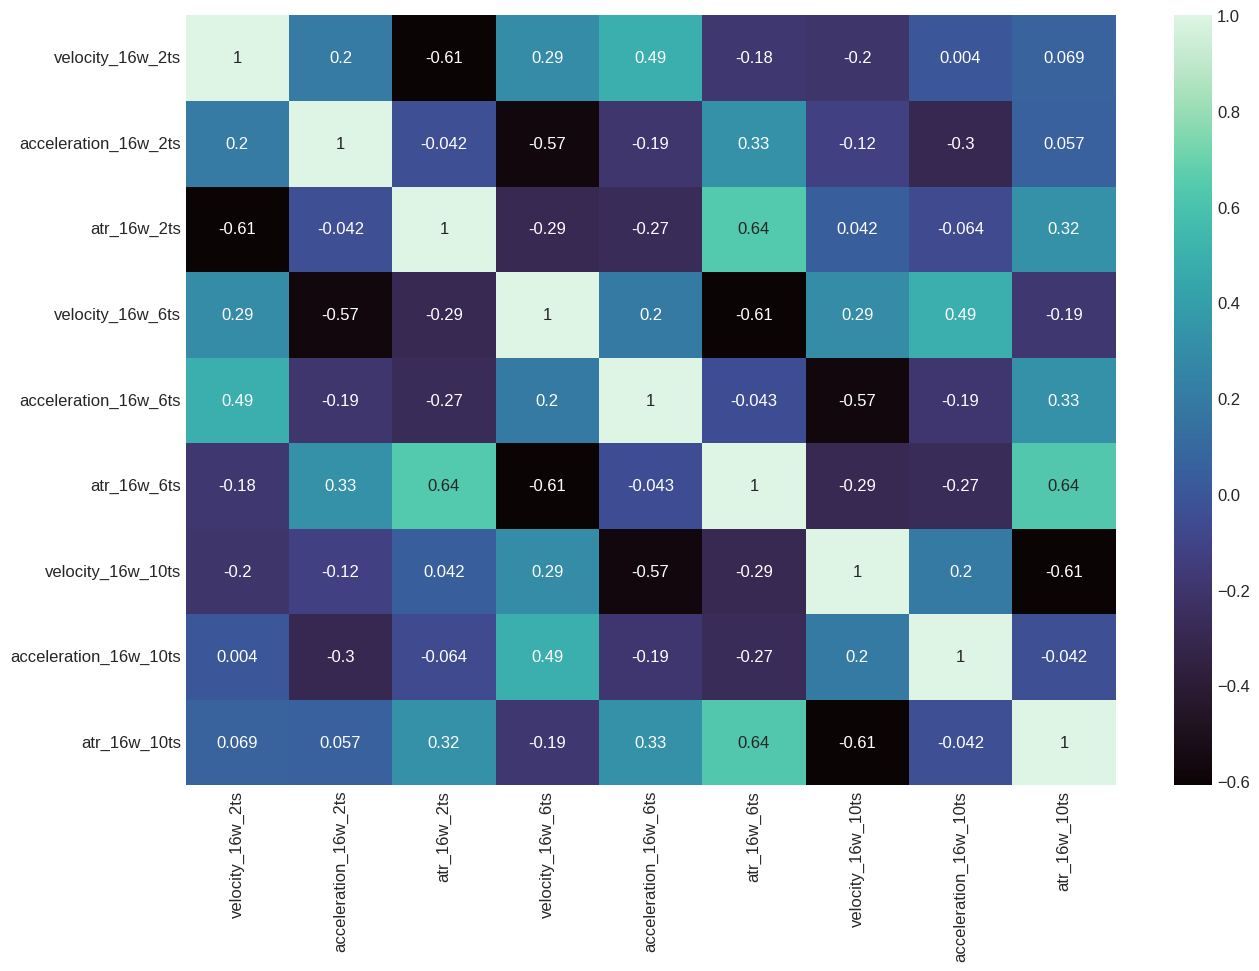

In [43]:
plt.figure(figsize=(15,10))
columns = [
    'velocity_16w_2ts', 'acceleration_16w_2ts', 'atr_16w_2ts',
    'velocity_16w_6ts', 'acceleration_16w_6ts', 'atr_16w_6ts',
    'velocity_16w_10ts', 'acceleration_16w_10ts', 'atr_16w_10ts'
]
window16 = norm_df[columns].corr()
sns.heatmap(window16, cmap='mako', annot=True)

## 32 day Window with multiple time shifts (2, 6, 10)

<Axes: >

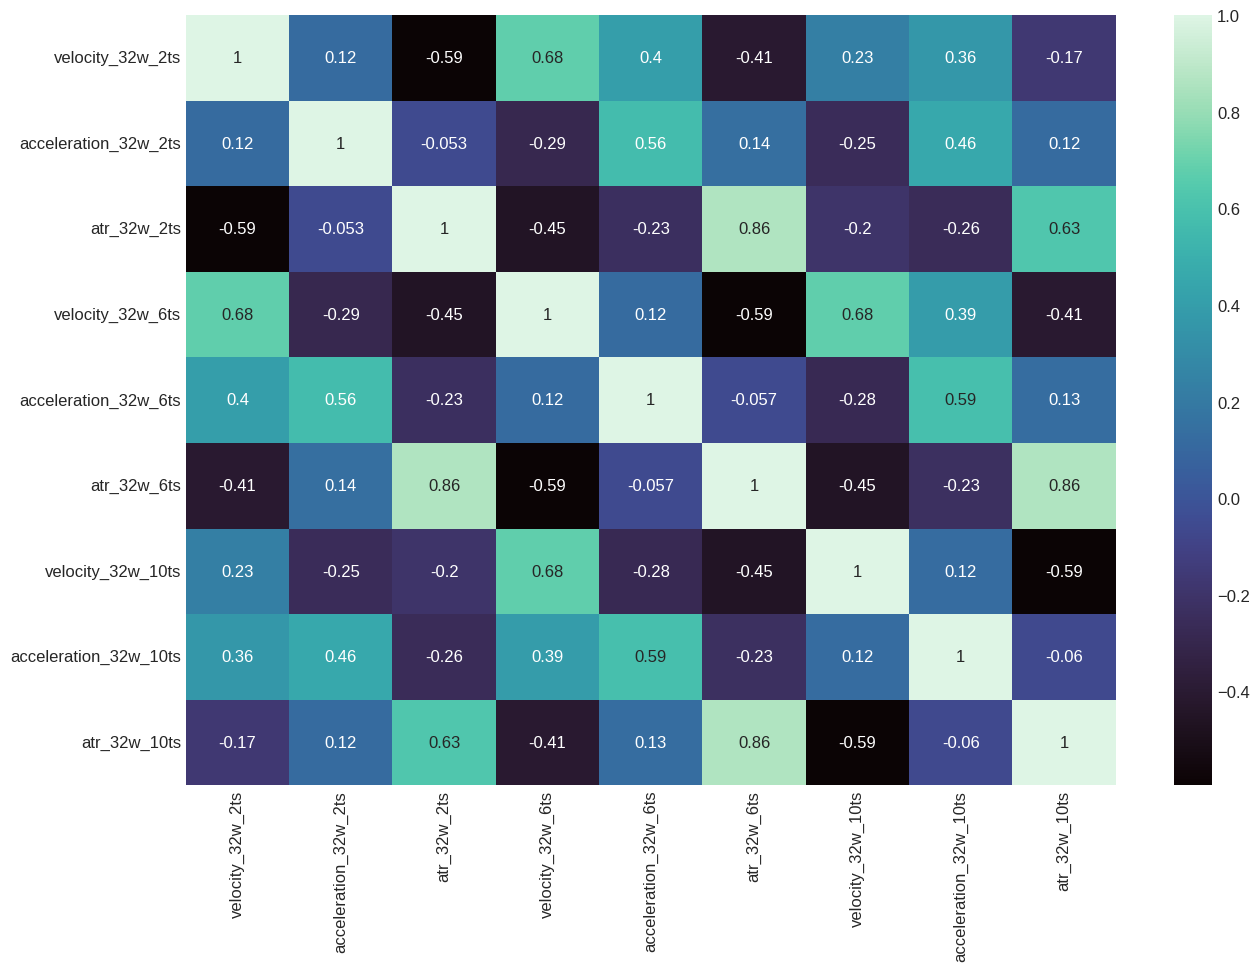

In [44]:
plt.figure(figsize=(15,10))
columns = [
    'velocity_32w_2ts', 'acceleration_32w_2ts', 'atr_32w_2ts',
    'velocity_32w_6ts', 'acceleration_32w_6ts', 'atr_32w_6ts',
    'velocity_32w_10ts', 'acceleration_32w_10ts', 'atr_32w_10ts'
]
window16 = norm_df[columns].corr()
sns.heatmap(window16, cmap='mako', annot=True)

## 64 day Window with multiple time shifts (2, 6, 10)

<Axes: >

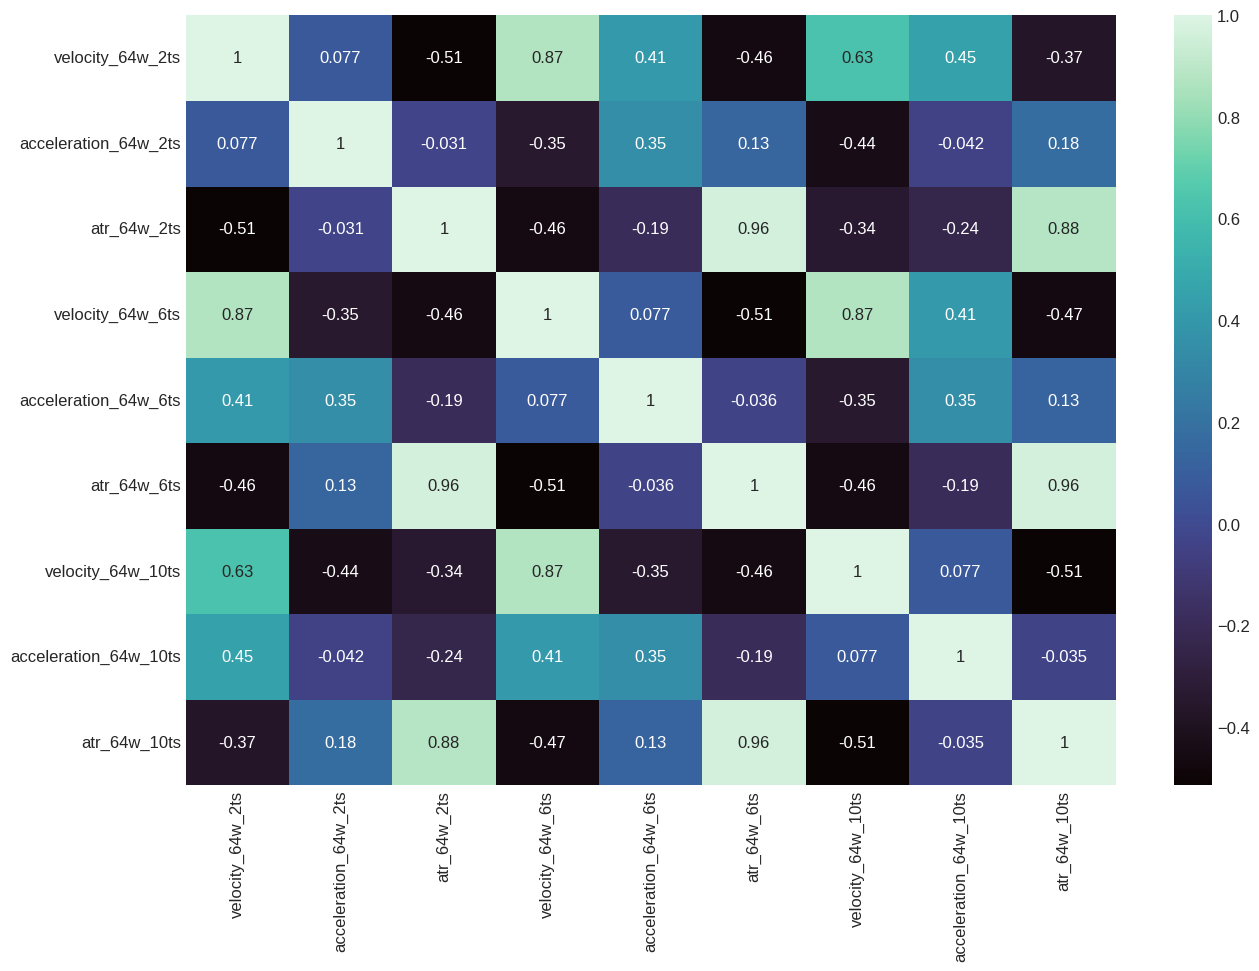

In [45]:
plt.figure(figsize=(15,10))
columns = [
    'velocity_64w_2ts', 'acceleration_64w_2ts', 'atr_64w_2ts',
    'velocity_64w_6ts', 'acceleration_64w_6ts', 'atr_64w_6ts',
    'velocity_64w_10ts', 'acceleration_64w_10ts', 'atr_64w_10ts'
]
window16 = norm_df[columns].corr()
sns.heatmap(window16, cmap='mako', annot=True)